In [25]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
running_colab = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False
if running_colab:
    from google.colab import drive
    drive.mount('/content/drive')
if running_colab:
    data_path = '/content/drive/MyDrive/Colab Notebooks/ai6th/data/optiver/'
else:
    data_path = '../../data/'

In [27]:
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
artists_df = pd.read_csv(os.path.join(data_path, 'artists_info.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))
artists_df.loc[artists_df['name'] == 'Albrecht Dürer', 'name'] = 'Albrecht Du rer'
train_df.loc[3896, 'artist'] = 'Titian'
train_df.loc[3986, 'artist'] = 'Alfred Sisley'

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['artist_no'] = le.fit_transform(train_df['artist'])

In [29]:
# 훈련 그림수 추가
count_df = train_df.groupby(['artist', 'artist_no'])[['id']].count().rename(columns={'id':'count'}).reset_index()
artists_df = pd.merge(artists_df, count_df, left_on='name', right_on='artist')

In [30]:
count_df.sort_values(by='count')

,artist,artist_no,count
25,Jackson Pollock,25,21
14,Eugene Delacroix,14,26
17,Georges Seurat,17,30
6,Caravaggio,6,32
34,Paul Cezanne,34,33
31,Michelangelo,31,34
20,Gustave Courbet,20,42
12,Edvard Munch,12,44
49,William Turner,49,44
8,Diego Rivera,8,50


In [31]:
import cv2


def get_images(img_paths):
    images = []
    for path in img_paths:
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    return images

In [32]:
def show_images(images):
    assert len(images)<=8
    height = round(len(images)/2)
    width = 2
    plt.figure(figsize=(8,8))   
    for n in range(len(images)):
        plt.subplot(height, width, n+1)
        plt.imshow(images[n])
        plt.grid(False)
        plt.title(f'{images[n].shape}')
    plt.show()

In [33]:
def print_artist_info(artist_name):
    # name, years, genre,nationality
    artist_info = artists_df[artists_df['name']==artist_name]
    print(f"이름 : {artist_info['name'].values[0]}")
    print(f"출생-사망 : {artist_info['years'].values[0]}")
    print(f"장르 : {artist_info['genre'].values[0]}")
    print(f"국가 : {artist_info['nationality'].values[0]}")
    print(f"훈련 그림수 : {artist_info['count'].values[0]}")

In [34]:
import random

def show_samples(df, artist_no=None):
    if artist_no:
        artist_name = le.inverse_transform([artist_no])[0]
        img_paths = list(df.loc[df['artist_no'] == artist_no, 'img_path'].apply(lambda p: os.path.join(data_path, p)).values)
        print_artist_info(artist_name)
    else:
        img_paths = list(df.loc[:, 'img_path'].apply(lambda p: os.path.join(data_path, p)).values)
    images = get_images(random.sample(img_paths, 4))
    show_images(images)

이름 : Caravaggio
출생-사망 : 1571 - 1610
장르 : Baroque
국가 : Italian
훈련 그림수 : 32


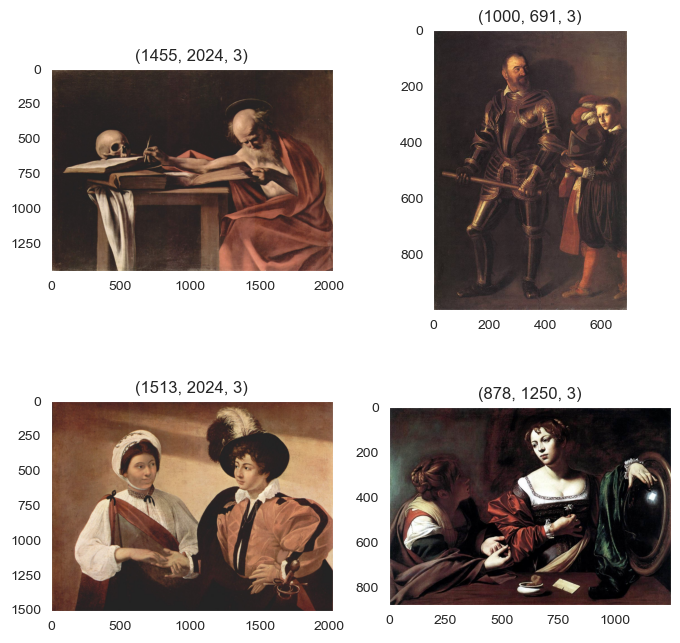

In [35]:
artist_no = 6
show_samples(train_df, artist_no)

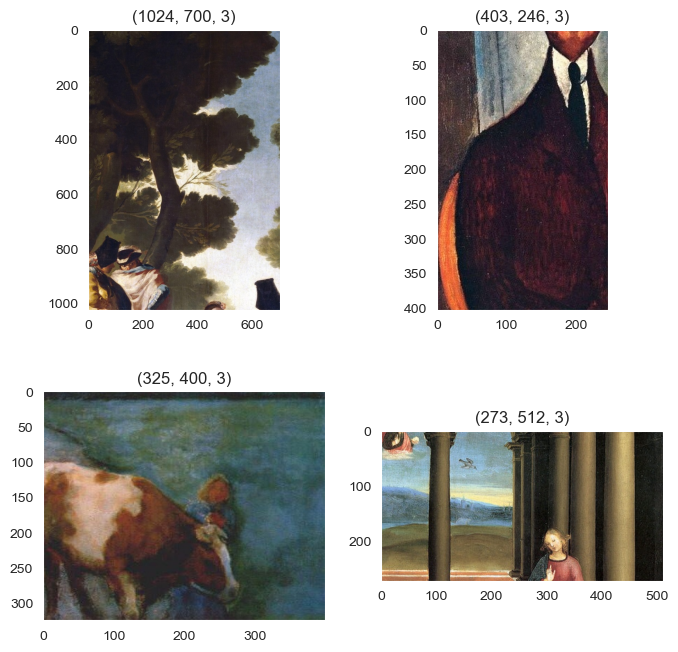

In [44]:
show_samples(test_df)